In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

In [2]:
from stable_baselines3 import PPO

## MlpPolicy bare results

In [4]:
BASE_PATH = r'C:\Users\ultramarine\Desktop\ppo_magisterka\trainloop_driver_official\trainloop-driver\models\mlppolicy'
model = PPO.load(os.path.join(BASE_PATH, 'PPO_MlpPolicy_model'))
X = np.load(os.path.join(BASE_PATH, 'PPO_MlpPolicy_observations.npy'))
X = torch.Tensor(X)
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

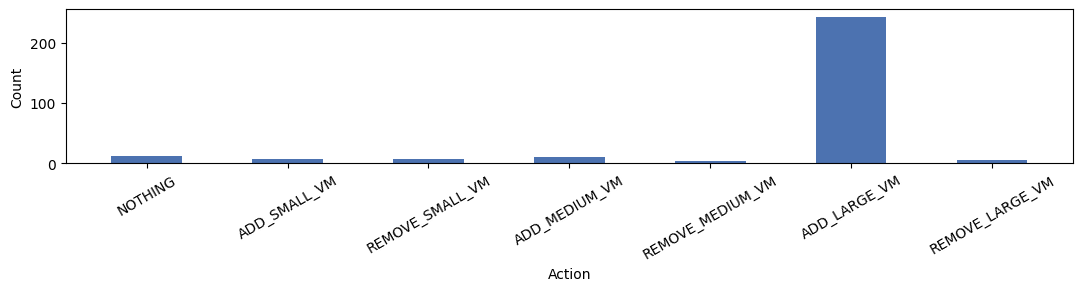

In [5]:
plot_action_histogram(predictions)

# Attributions

c:\Users\ultramarine\.conda\envs\trainloop_py37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


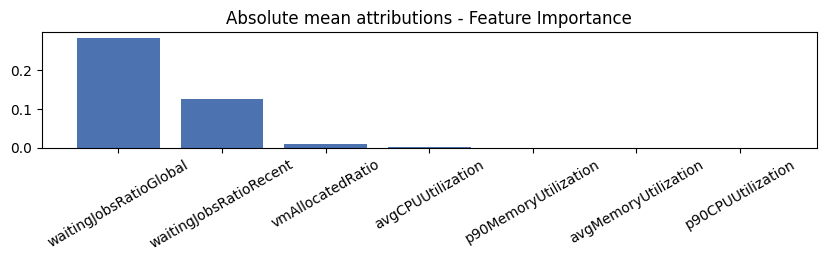

In [6]:
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)
x = torch.tensor(X[0])
ppo_net.forward(x)
N = 2000
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample)
mean_attributions_per_action = ig_attributor.get_mean_attributions()
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], abs=True)


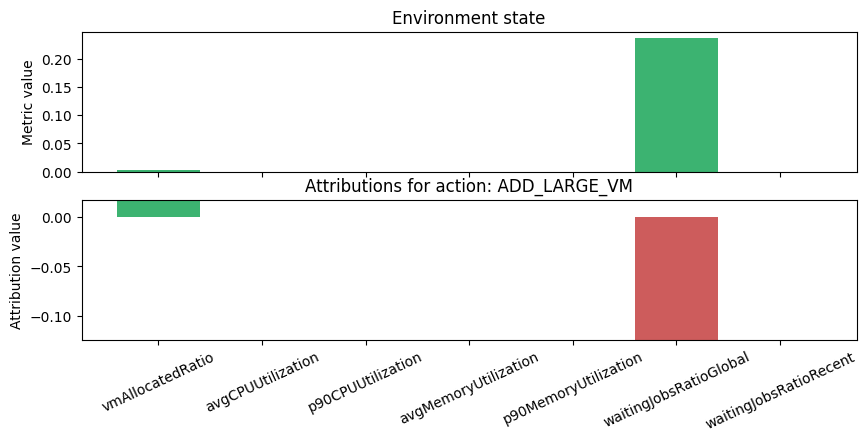

In [7]:
ig_attributor.explain_example(idx=150)